## Data Collection.
* The Dataset is collected from scrapping from cardheko webiste
* The data consists of 13 column and 15411 rows.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [136]:
df = pd.read_csv(r"./data/cardekho_imputated.csv", index_col=[0])

In [137]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [138]:
# Check for missing values
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [139]:
# Drop unnecessary column
df = df.drop('car_name', axis=1)

In [140]:
df

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15411 non-null  object 
 1   model              15411 non-null  object 
 2   vehicle_age        15411 non-null  int64  
 3   km_driven          15411 non-null  int64  
 4   seller_type        15411 non-null  object 
 5   fuel_type          15411 non-null  object 
 6   transmission_type  15411 non-null  object 
 7   mileage            15411 non-null  float64
 8   engine             15411 non-null  int64  
 9   max_power          15411 non-null  float64
 10  seats              15411 non-null  int64  
 11  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ MB


In [142]:
numeric_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15411 non-null  object 
 1   model              15411 non-null  object 
 2   vehicle_age        15411 non-null  int64  
 3   km_driven          15411 non-null  int64  
 4   seller_type        15411 non-null  object 
 5   fuel_type          15411 non-null  object 
 6   transmission_type  15411 non-null  object 
 7   mileage            15411 non-null  float64
 8   engine             15411 non-null  int64  
 9   max_power          15411 non-null  float64
 10  seats              15411 non-null  int64  
 11  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ MB


In [144]:
# Standardize categorical columns
cat_cols = ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
for col in cat_cols:
    df[col] = df[col].str.strip().str.title()
    print(f"\nUnique values in {col}:\n", df[col].value_counts())


Unique values in brand:
 brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
Bmw               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
Mg                 19
Mini               17
Nissan             11
Lexus              10
Isuzu              10
Bentley             3
Maserati            2
Ferrari             1
Mercedes-Amg        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

Unique values in model:
 model
I20             906
Swift Dzire     890
Swift           781
Alto            778
City            757
               ... 
Altroz            1
C                 1
Ghost             1
Quattroporte      1
Gurkha            1
Name: co

In [145]:
df = df.drop(df[df['vehicle_age'] >= 20].index, axis=0)

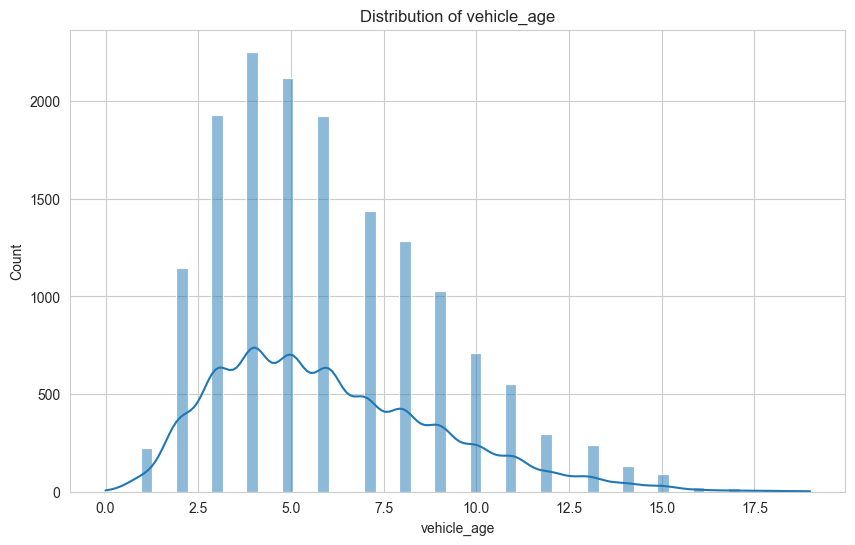

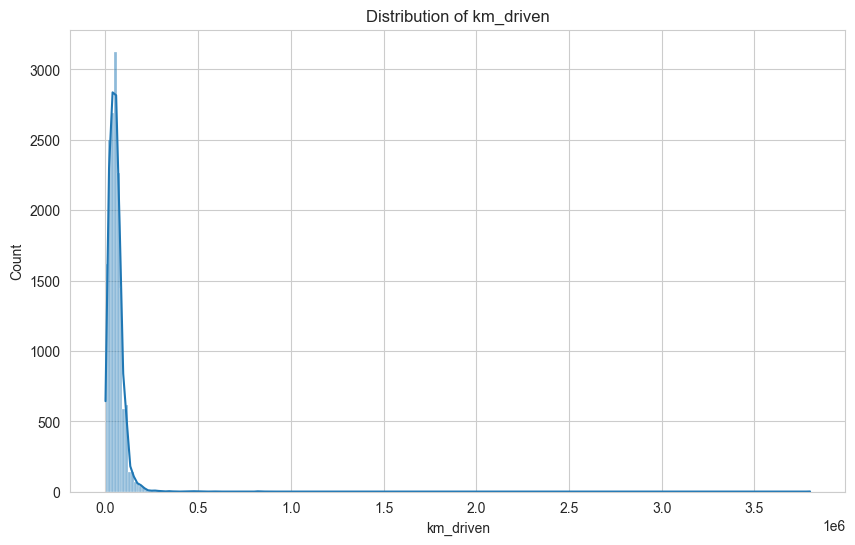

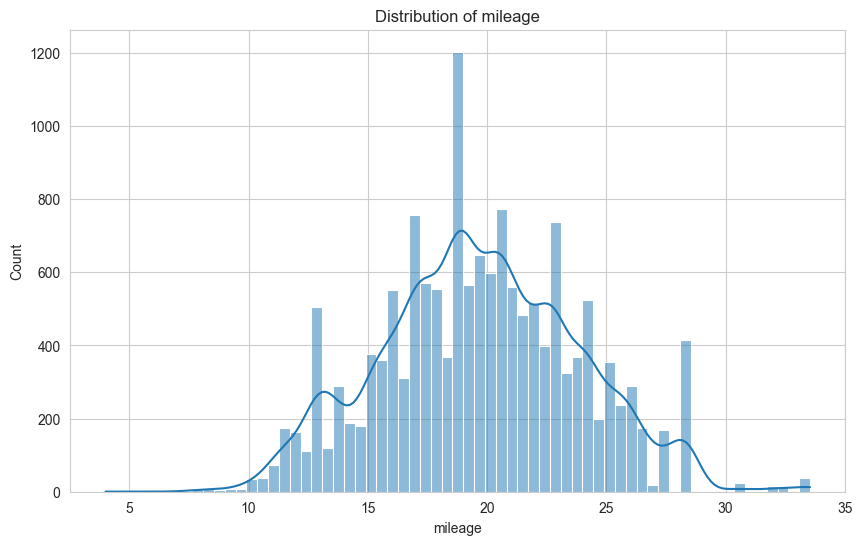

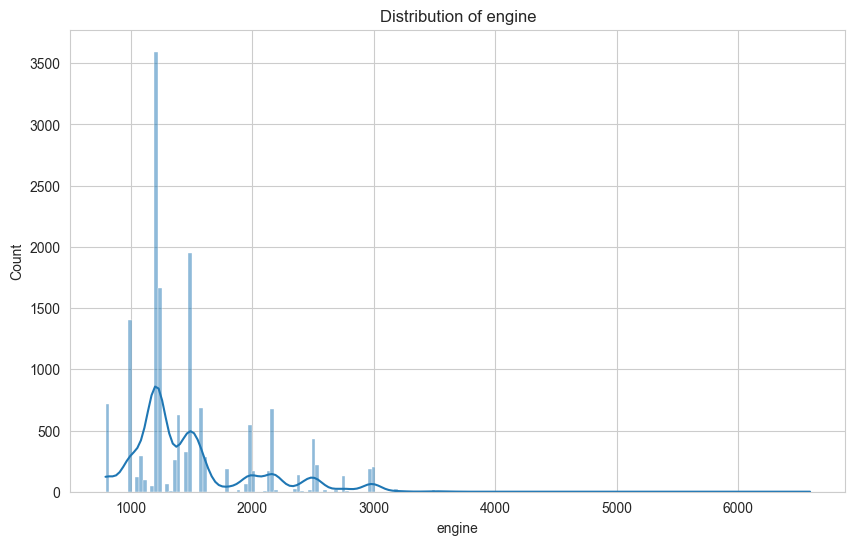

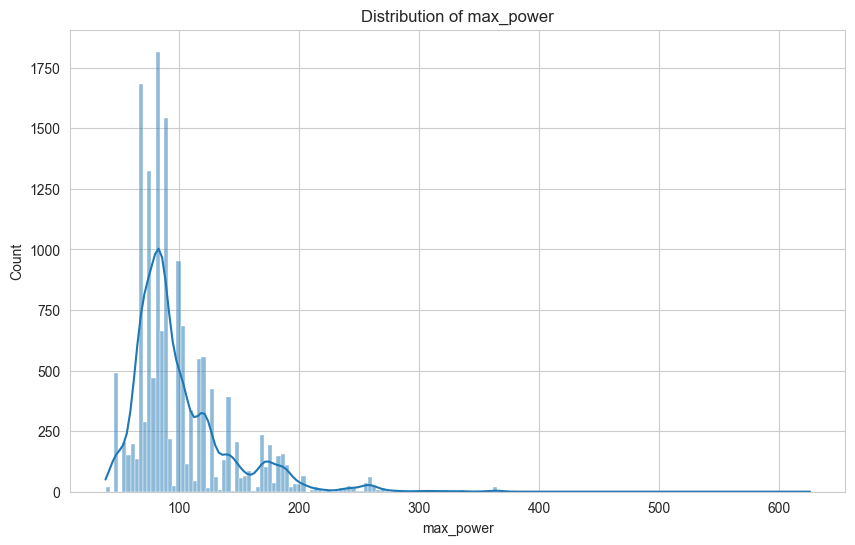

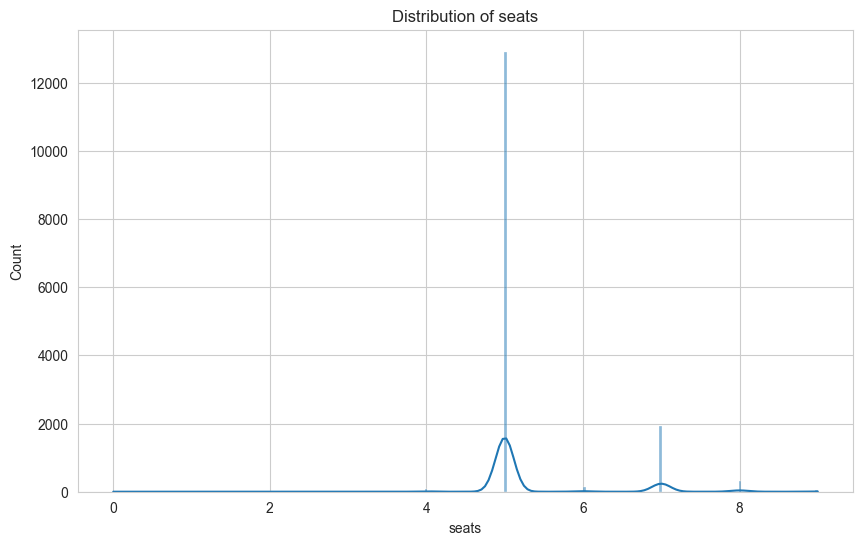

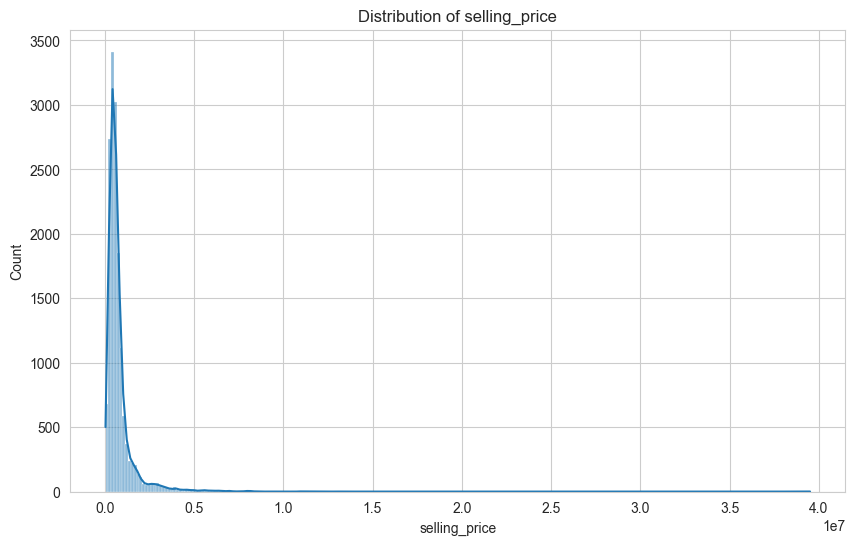

In [146]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

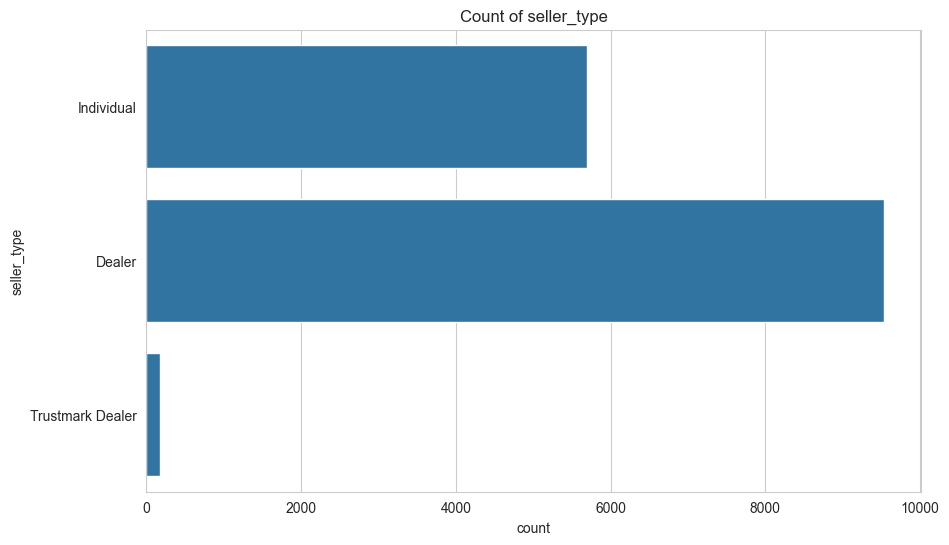

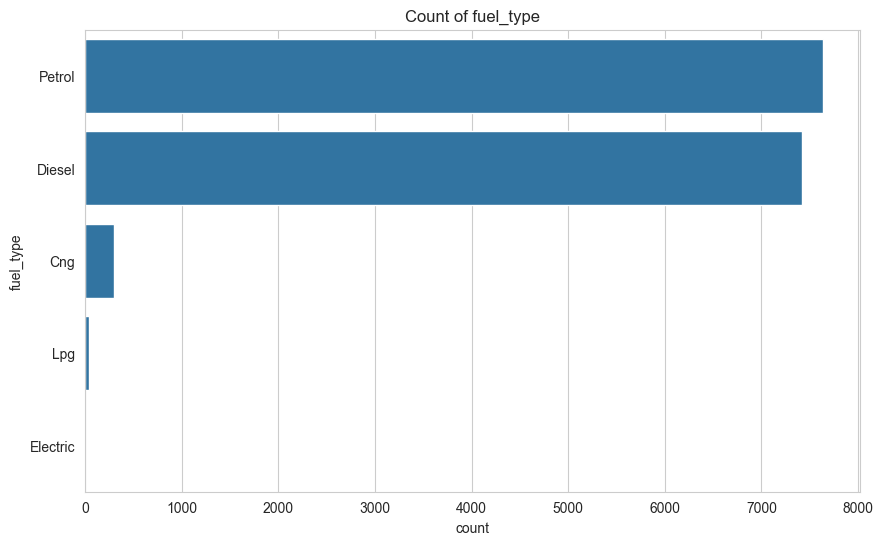

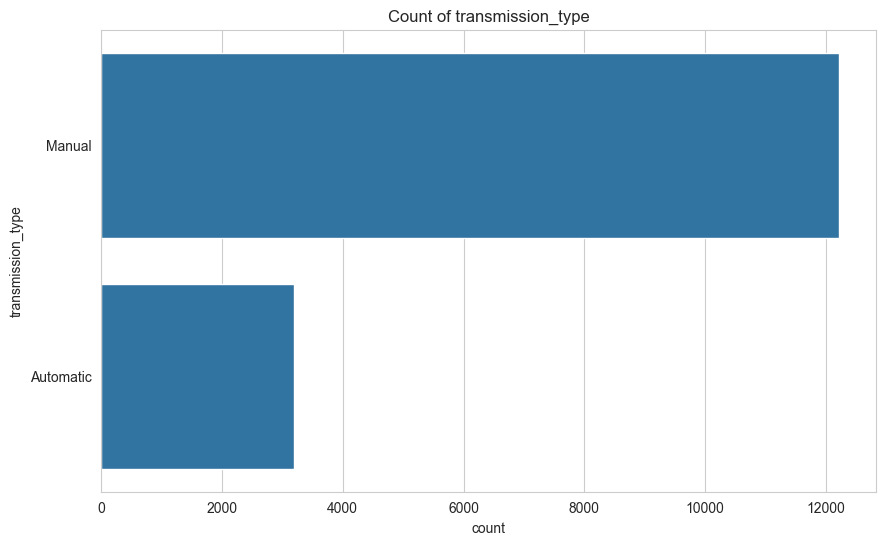

In [147]:
# Categorical features
for col in ['seller_type', 'fuel_type', 'transmission_type']:
    plt.figure()
    sns.countplot(y=df[col])
    plt.title(f'Count of {col}')
    plt.show()

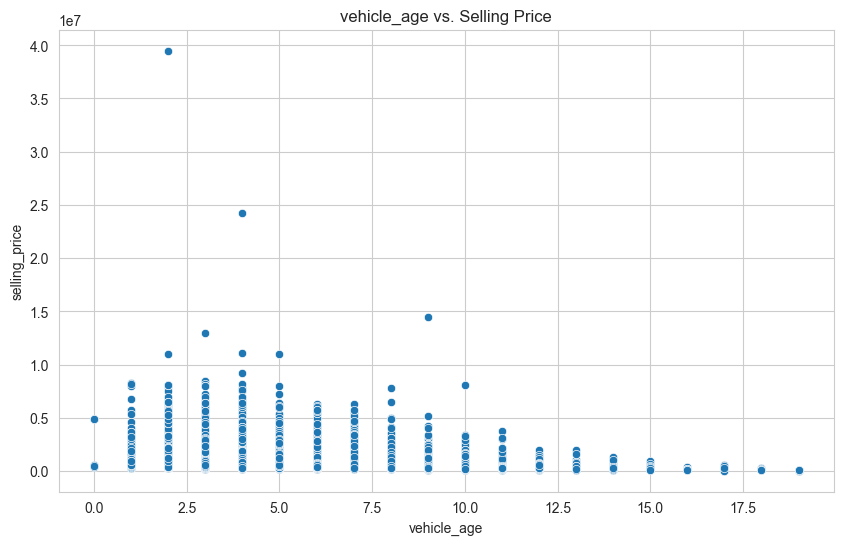

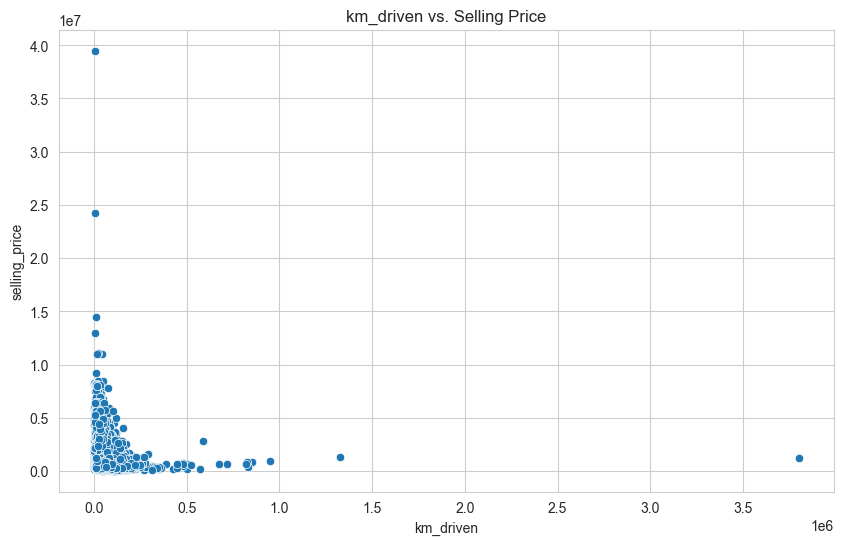

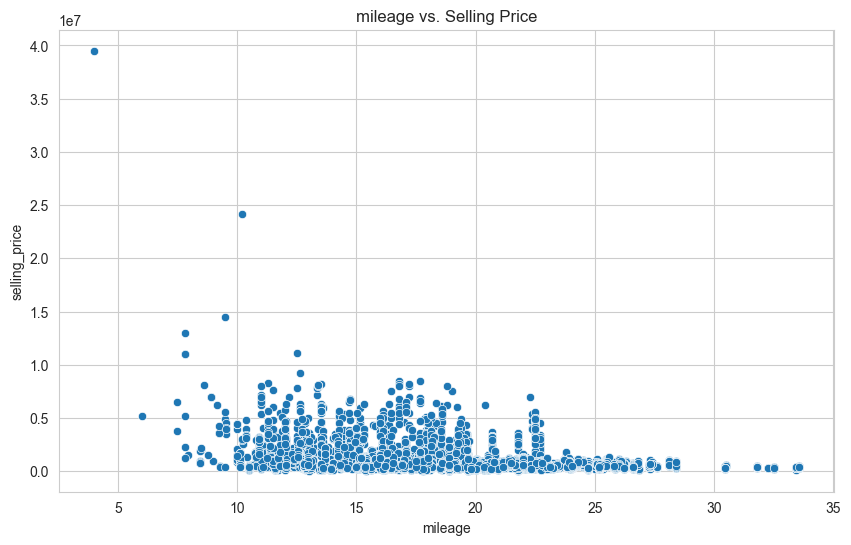

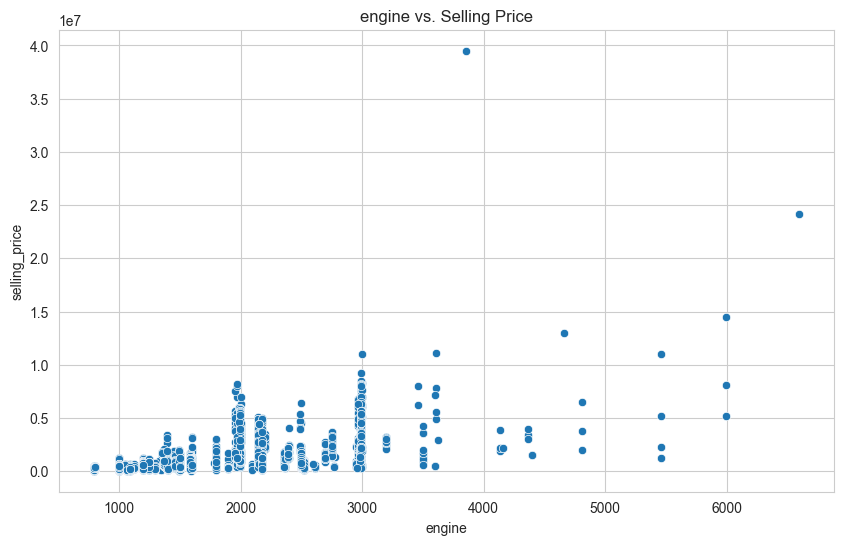

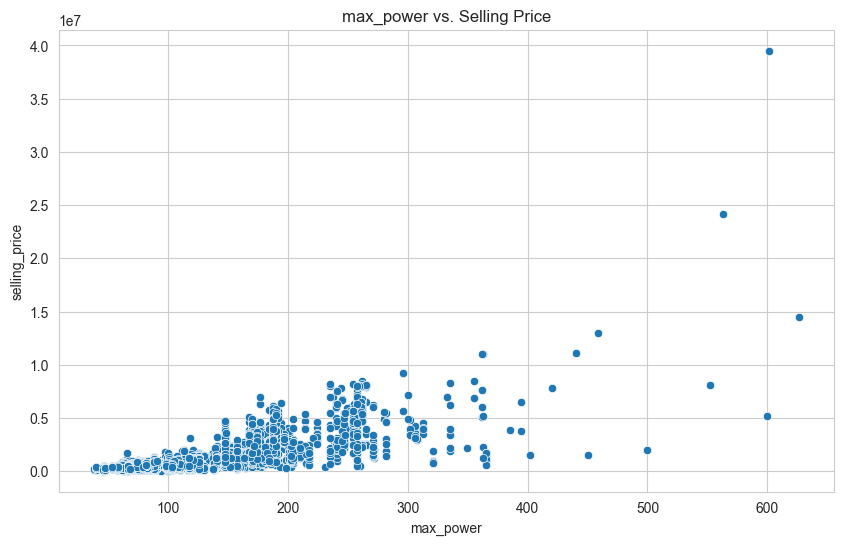

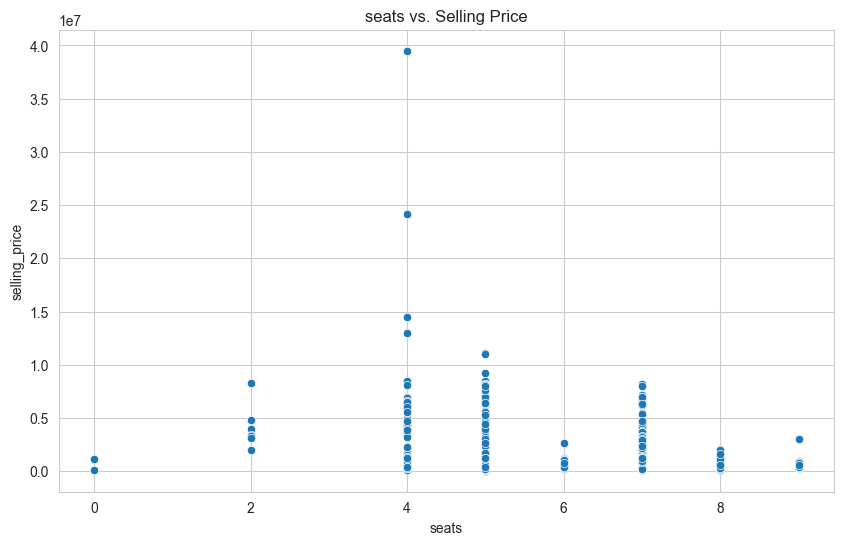

In [148]:
# Bivariate Analysis
# Numerical vs. selling_price
for col in numeric_cols[:-1]:  # Exclude selling_price
    plt.figure()
    sns.scatterplot(x=df[col], y=df['selling_price'])
    plt.title(f'{col} vs. Selling Price')
    plt.show()

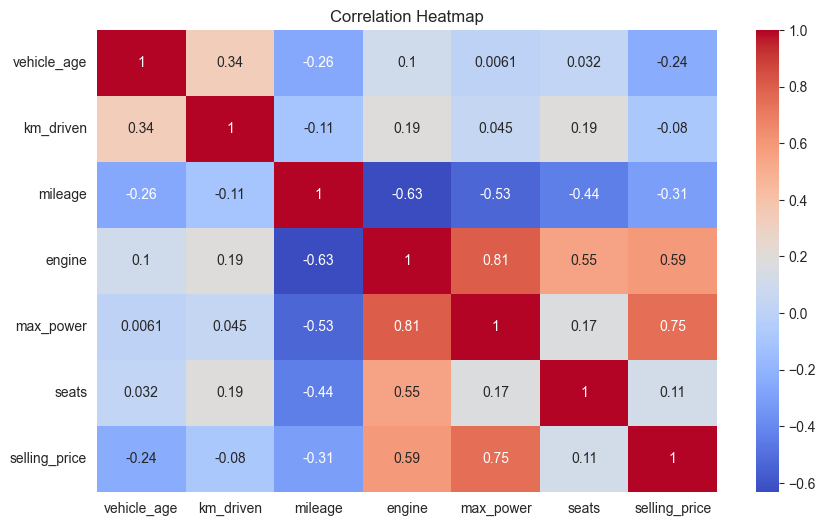

In [149]:
# Correlation heatmap
plt.figure()
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

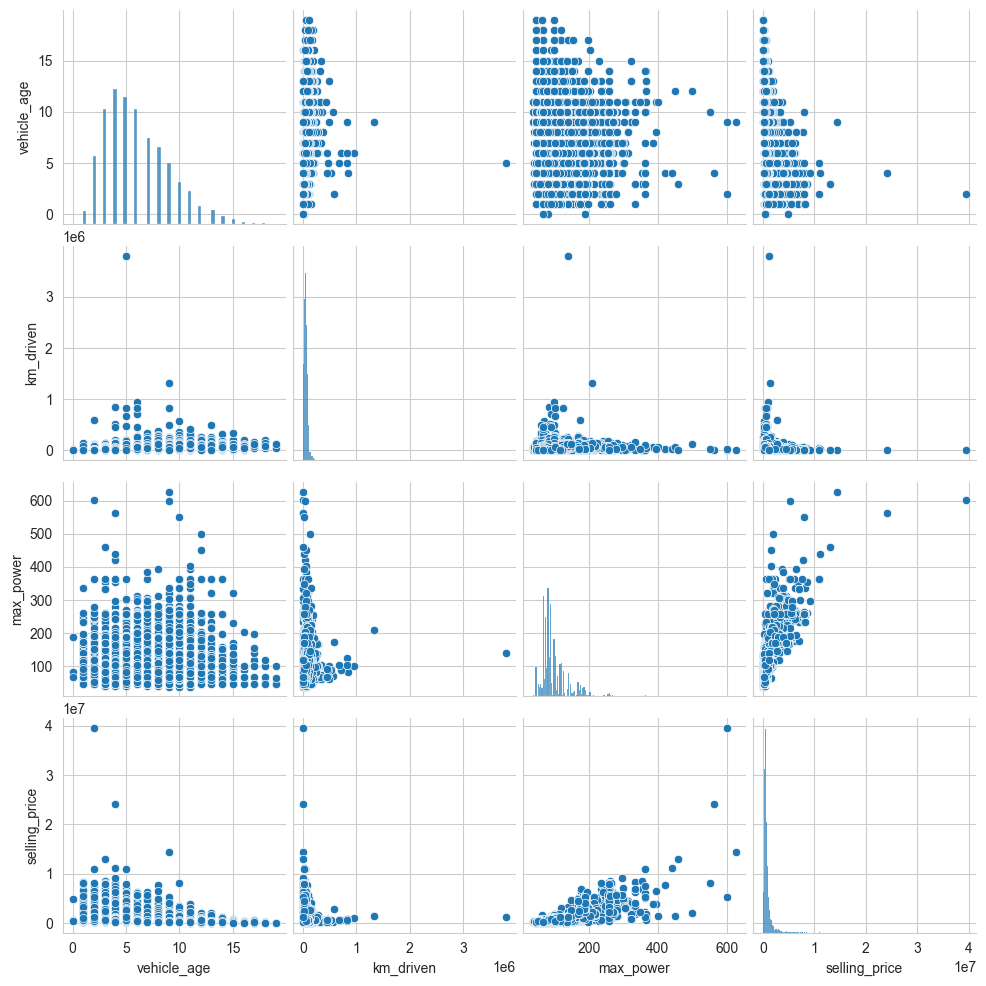

In [150]:
# Multivariate Analysis
# Pair plot for key numerical features
sns.pairplot(df[['vehicle_age', 'km_driven', 'max_power', 'selling_price']])
plt.show()


In [151]:
df.to_csv('cleaned_data.csv')